In [53]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy import crs, feature
import numpy as np

In [62]:
#cr for DR Congo 
ds_cr = xr.open_dataset('Congo_Dr.nc')
ds_cr = ds_cr.where(ds_cr !=-99)
ds_cr

<xarray.Dataset>
Dimensions:   (datetime: 3653, lat: 37, lon: 32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2021-12-31
  * lon       (lon) float32 11.0 11.25 11.5 11.75 12.0 ... 18.0 18.25 18.5 18.75
  * lat       (lat) float32 4.0 3.75 3.5 3.25 3.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue May 02 11:53:38 2023: cdo mergetime, PERSIANN_Republic_...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [67]:

dc_cc = ds_cr.precip
dt_cr=ds_cr.precip.sel(lon=15.8277,lat=0.2280, method='nearest')
da_cr = dt_cr.sel(datetime=slice('2011','2020'))
da_cr

<xarray.DataArray 'precip' (datetime: 3288)>
array([ 0.  , 13.08,  1.39, ..., 29.19,  1.33,  7.67], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2012-01-01 2012-01-02 ... 2020-12-31
    lon       float32 15.75
    lat       float32 0.25
Attributes:
    grid_mapping:  crs

In [68]:
#monthly totals
mon_totals = da_cr.groupby('datetime.month').sum('datetime')
mon_totals

<xarray.DataArray 'precip' (month: 12)>
array([9.6546997e+02, 2.0584902e+03, 2.7177900e+03, 2.1892400e+03,
       2.0128799e+03, 9.8647003e+02, 5.2842999e+02, 8.6629999e+02,
       1.8981301e+03, 2.3873198e+03, 2.2345300e+03, 3.4129261e+33],
      dtype=float32)
Coordinates:
    lon      float32 15.75
    lat      float32 0.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [69]:
#monthly climatology
mon_clim = da_cr.groupby('datetime.month').mean('datetime')
mon_clim

<xarray.DataArray 'precip' (month: 12)>
array([3.4604659e+00, 8.0725107e+00, 9.7762232e+00, 8.1082964e+00,
       7.2146235e+00, 3.6535928e+00, 1.8940144e+00, 3.1050179e+00,
       7.0301118e+00, 8.6184835e+00, 8.2760372e+00, 1.2232711e+31],
      dtype=float32)
Coordinates:
    lon      float32 15.75
    lat      float32 0.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

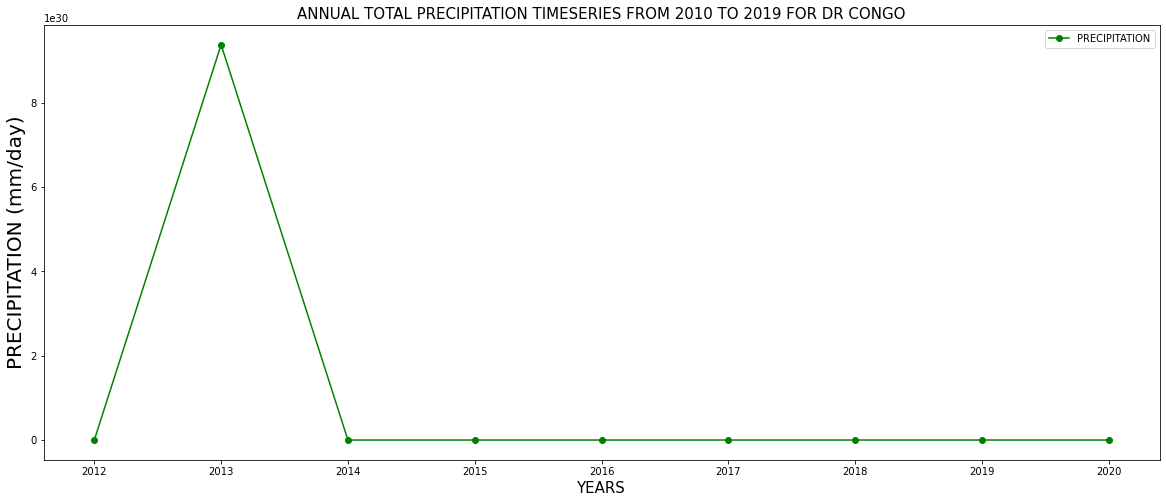

In [70]:
#Annual totals
annual_total = da_cr.groupby('datetime.year').mean('datetime')
annual_total.plot(color = 'green', marker='o', label='PRECIPITATION')

barwidth = 0.1
plt.rcParams['figure.figsize']=[20,8]

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('YEARS', fontsize =15, color='black')

plt.title('ANNUAL TOTAL PRECIPITATION TIMESERIES FROM 2010 TO 2019 FOR DR CONGO', fontsize =15, color='black')

#plt.savefig('Annual_Total_timeseries.png')
plt.show()

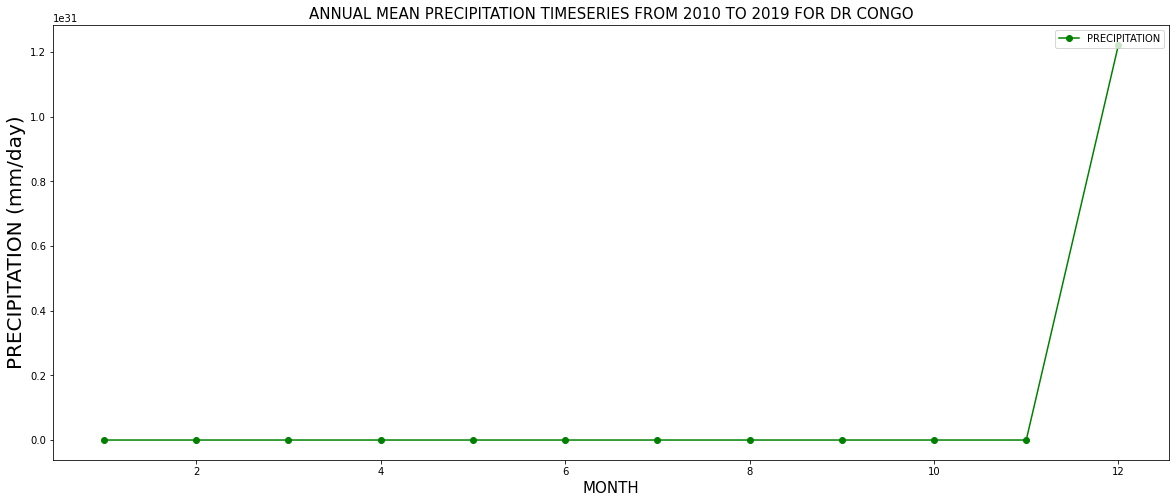

In [71]:
#Annual Average
annual_mean = da_cr.groupby('datetime.month').mean('datetime')
annual_mean.plot(color = 'green', marker='o', label='PRECIPITATION')

barwidth = 0.1
plt.rcParams['figure.figsize']=[15,6]

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('MONTH', fontsize =15, color='black')

plt.title('ANNUAL MEAN PRECIPITATION TIMESERIES FROM 2010 TO 2019 FOR DR CONGO', fontsize =15, color='black')

#plt.savefig('Annual_Mean_timeseries.png')
plt.show()

# COMPUTING THE NUMBER OF DRY (RR<1mm) and WET (RR>1mm)days(PER MONTH and PER YEAR) DR CCONGO 2010 TO 2019

In [72]:
Monthly_RR2 = da_cr.groupby('datetime.month').sum()
Monthly_RR2

<xarray.DataArray 'precip' (month: 12)>
array([9.6546997e+02, 2.0584902e+03, 2.7177900e+03, 2.1892400e+03,
       2.0128799e+03, 9.8647003e+02, 5.2842999e+02, 8.6629999e+02,
       1.8981301e+03, 2.3873198e+03, 2.2345300e+03, 3.4129261e+33],
      dtype=float32)
Coordinates:
    lon      float32 15.75
    lat      float32 0.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# TIMESERIES OF DRY(RR<1mm) AND WET(RR>1mm) PER A MONTH

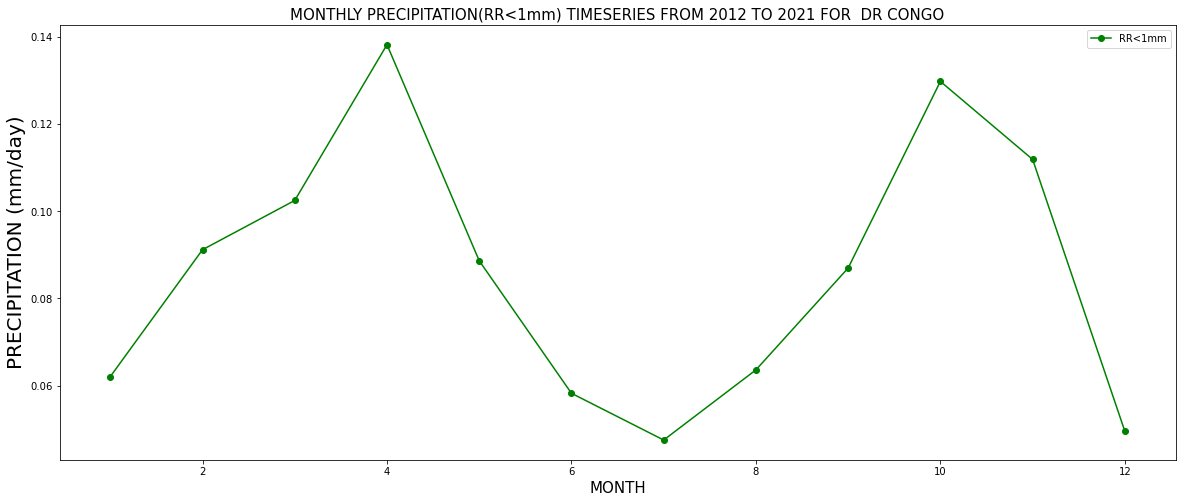

In [96]:
dry_congo= da_cr.where(dc_cc <1).sel(lon=15.75,lat=0.25, datetime=slice('2010','2019'))
dry_congo=dry_dr_congo.where(dry_congo !=-99)

dry_cmon=dry_congo.groupby('datetime.month').mean('datetime')
dry_cmon.plot( color='green', marker='o', label='RR<1mm')

barwidth = 0.3
plt.rcParams['figure.figsize']=[20,5]

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('MONTH', fontsize =15, color='black')

plt.title('MONTHLY PRECIPITATION(RR<1mm) TIMESERIES FROM 2012 TO 2021 FOR  DR CONGO', fontsize =15, color='black')

plt.show()

#  TIMESERIES OF DRY(RR<1mm) AND WET(RR>1mm) PER A YEAR

In [84]:
print(da_cr.lat.values)

0.25


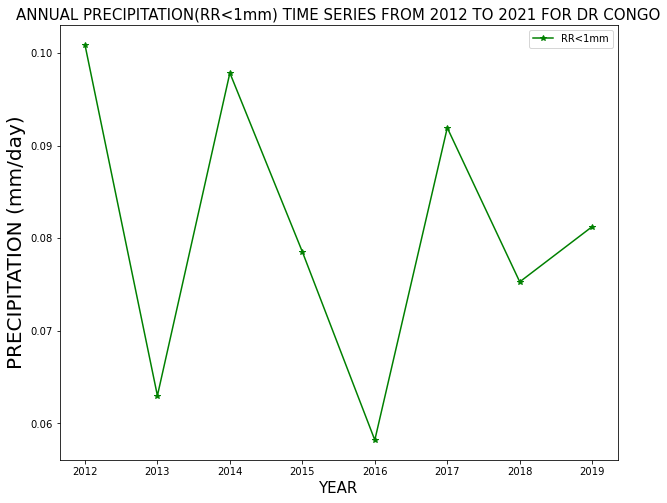

In [141]:
dry_congo= da_cr.where(dc_cc <1).sel(lon=15.75,lat=-0.25, datetime=slice('2012','2021'))
dry_congo=dry_dr_congo.where(dry_congo !=-99)

dry_cmon=dry_congo.groupby('datetime.year').mean('datetime')
dry_cmon.plot(marker='*', color='green', label='RR<1mm')

barwidth = 0.1
plt.rcParams['figure.figsize']=[20,5]

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('YEAR', fontsize =15, color='black')

plt.title('ANNUAL PRECIPITATION(RR<1mm) TIME SERIES FROM 2012 TO 2021 FOR DR CONGO', fontsize =15, color='black')

plt.show()

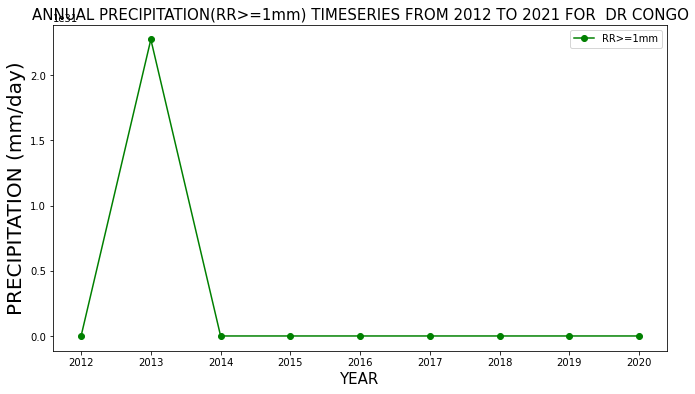

In [110]:
wet_congo= da_cr.where(dc_cc >=1).sel(lon=15.75,lat=0.25, datetime=slice('2012','2021'))
wet_congo=wet_congo.where(wet_congo !=-99)

wet_cmon=wet_congo.groupby('datetime.year').mean('datetime')
wet_cmon.to_series().reset_index()
wet_cmon.plot(marker='o', color='green', label='RR>=1mm')

barwidth = 0.1
plt.rcParams['figure.figsize']=[10,8]

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('YEAR', fontsize =15, color='black')

plt.title('ANNUAL PRECIPITATION(RR>=1mm) TIMESERIES FROM 2012 TO 2021 FOR  DR CONGO', fontsize =15, color='black')

plt.show()

In [104]:
import matplotlib.colors as mcolors

Text(0.5, 0.98, 'ANNUAL DRY PRECIPITATION(RR<1mm)')

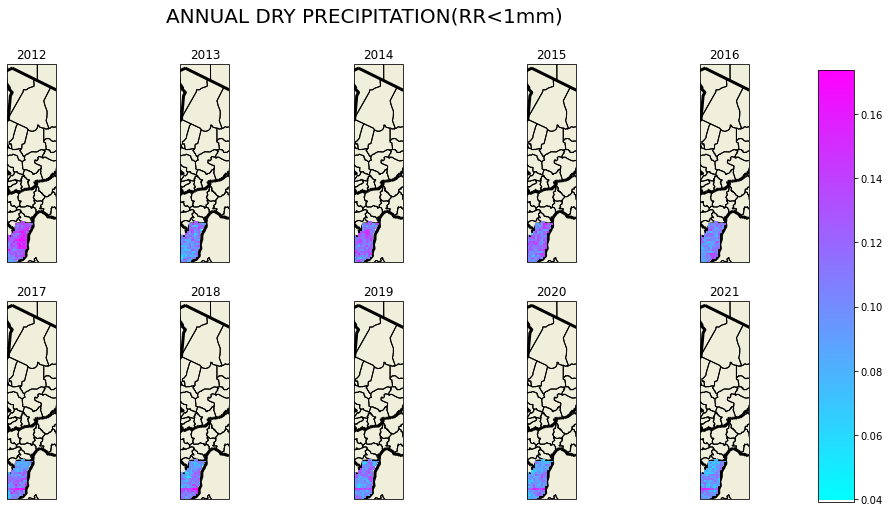

In [120]:


# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= dc_cc.where(dc_cc <1)
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')
Annual_dry
Year=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] 
    


    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(Year[i])
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('cool')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('cool', colors)
    
    cs = ax[i].pcolormesh(Annual_dry['lon'], Annual_dry['lat'], Annual_dry[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('ANNUAL DRY PRECIPITATION(RR<1mm)', fontsize='20')

Text(0.5, 0.98, 'ANNUAL WET PRECIPITATION(RR>=1mm)')

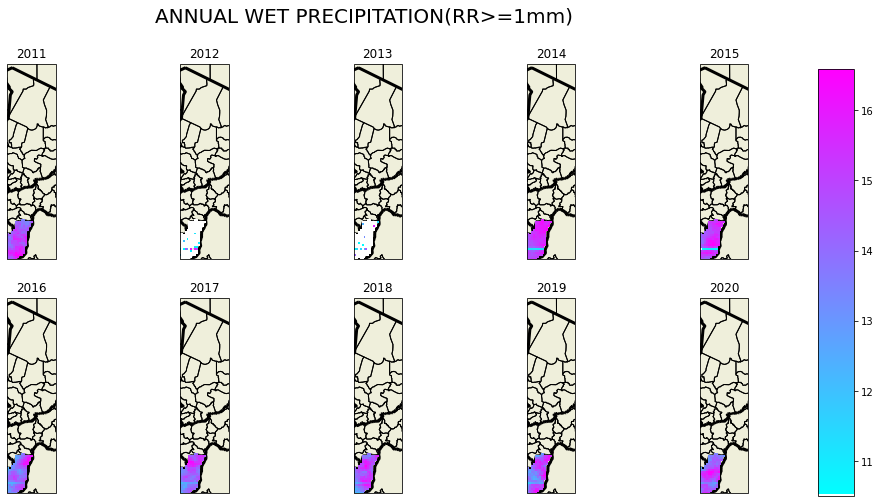

In [121]:
Annual_wet_RR= dc_cc.where(dc_cc >=1)
Annual_wet_RR
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_wet


Year=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] 
    
    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Year[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('cool')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('cool', colors)
    
    cs = ax[i].pcolormesh(Annual_wet['lon'], Annual_wet['lat'], Annual_wet[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('ANNUAL WET PRECIPITATION(RR>=1mm)', fontsize='20')

Text(0.5, 0.98, 'MONTHLY WET PRECIPITATION(RR>=1mm)')

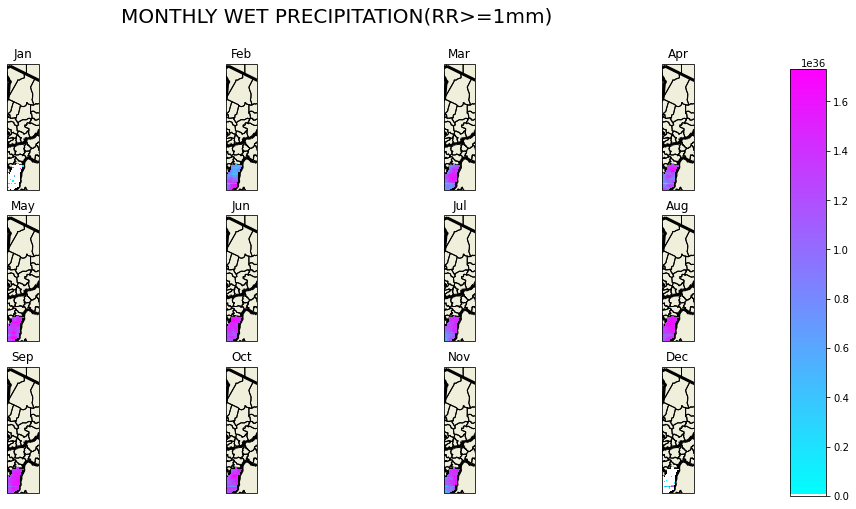

In [122]:
Monthly_wet_RR= dc_cc.where(dc_cc >=1)
Monthly_wet_RR
Monthly_wet=Annual_wet_RR.groupby('datetime.month').mean('datetime')
Monthly_wet

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Month[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('cool')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('cool', colors)
    
    cs = ax[i].pcolormesh(Monthly_wet['lon'], Monthly_wet['lat'], Monthly_wet[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('MONTHLY WET PRECIPITATION(RR>=1mm)', fontsize='20')

Text(0.5, 0.98, 'MONTHLY DRY PRECIPITATION(RR<1mm)')

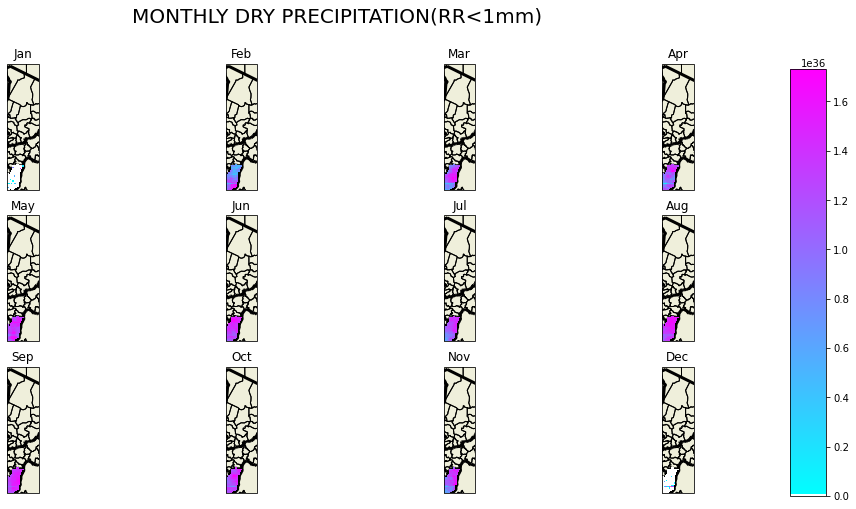

In [124]:
Monthly_dry_RR= dc_cc.where(dc_cc <1)
Monthly_dry_RR
Monthly_dry=Annual_dry_RR.groupby('datetime.month').mean('datetime')
Monthly_dry

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Month[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('cool')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('cool', colors)
    
    cs = ax[i].pcolormesh(Monthly_wet['lon'], Monthly_wet['lat'], Monthly_wet[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('MONTHLY DRY PRECIPITATION(RR<1mm)', fontsize='20')

In [ ]:
da_cr

# EXTREME RAINFALL (RR>10mm) AND  (RR>20mm)

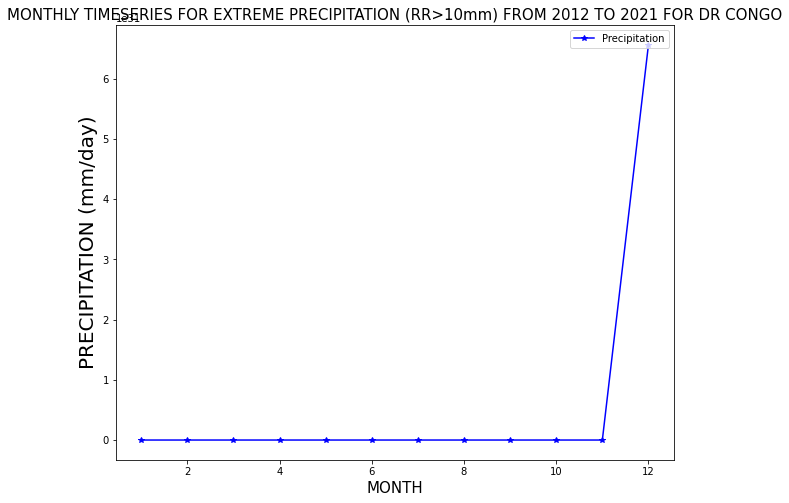

In [127]:
wet_congo= da_cr.where(dc_cc >10).sel(lon=15.75,lat=0.25, datetime=slice('2012','2021'))
wet_congo=wet_congo.where(wet_congo !=-99)

wet_cmon=wet_congo.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()
wet_cmon.plot(marker='*', color='b', label='Precipitation')

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('MONTH', fontsize =15, color='black')

plt.title('MONTHLY TIMESERIES FOR EXTREME PRECIPITATION (RR>10mm) FROM 2012 TO 2021 FOR DR CONGO', fontsize =15, color='black')

plt.show()

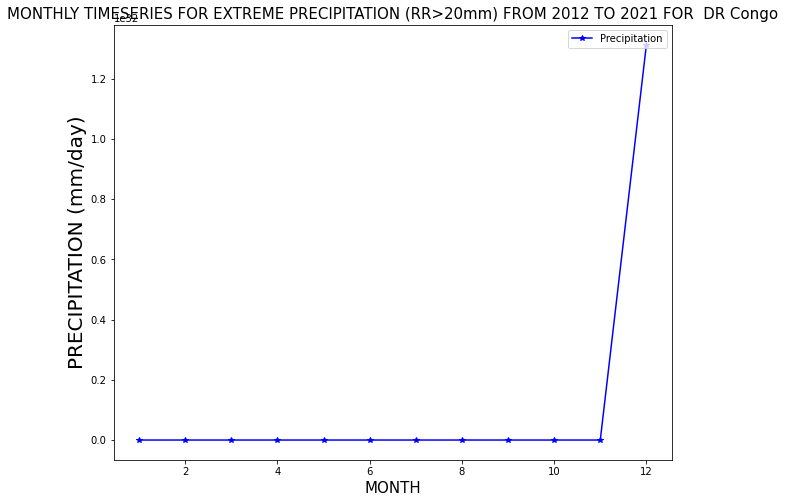

In [128]:
wet_congo= da_cr.where(dc_cc >20).sel(lon=15.75,lat=0.25, datetime=slice('2012','2021'))
wet_congo=wet_congo.where(wet_congo !=-99)

wet_cmon=wet_congo.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()
wet_cmon.plot(marker='*', color='b', label='Precipitation')

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('MONTH', fontsize =15, color='black')

plt.title('MONTHLY TIMESERIES FOR EXTREME PRECIPITATION (RR>20mm) FROM 2012 TO 2021 FOR  DR Congo', fontsize =15, color='black')

plt.show()

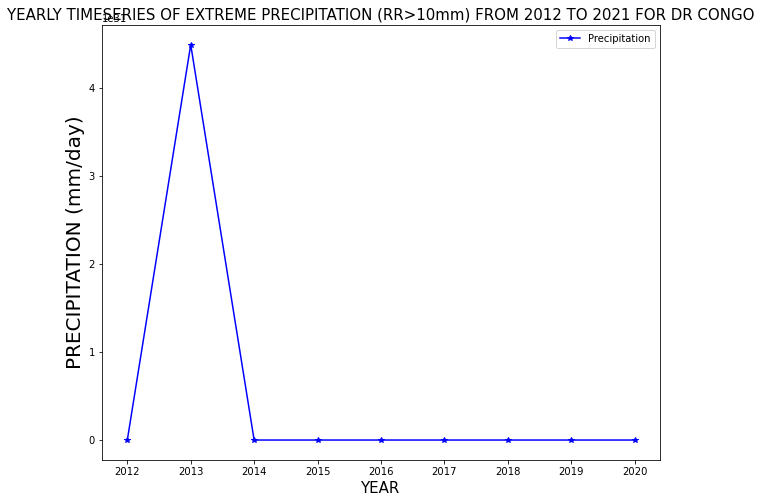

In [130]:
wet_congo= da_cr.where(dc_cc >10).sel(lon=15.75,lat=0.25, datetime=slice('2012','2021'))
wet_congo=wet_congo.where(wet_congo !=-99)

wet_cmon=wet_congo.groupby('datetime.year').mean('datetime')
wet_cmon.to_series().reset_index()
wet_cmon.plot(marker='*', color='b', label='Precipitation')

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('YEAR', fontsize =15, color='black')

plt.title('YEARLY TIMESERIES OF EXTREME PRECIPITATION (RR>10mm) FROM 2012 TO 2021 FOR DR CONGO', fontsize =15, color='black')

plt.show()

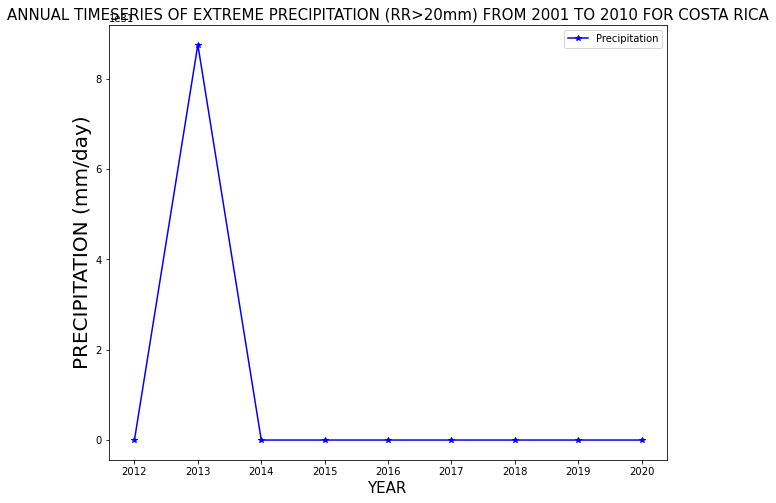

In [131]:
wet_congo= da_cr.where(dc_cc >20).sel(lon=15.75,lat=0.25, datetime=slice('2012','2021'))
wet_congo=wet_congo.where(wet_congo !=-99)

wet_cmon=wet_congo.groupby('datetime.year').mean('datetime')
wet_cmon.to_series().reset_index()
wet_cmon.plot(marker='*', color='b', label='Precipitation')

plt.legend(loc='upper right', fontsize=10)

plt.ylabel('PRECIPITATION (mm/day)', fontsize =20, color='black')

plt.xlabel('YEAR', fontsize =15, color='black')

plt.title('ANNUAL TIMESERIES OF EXTREME PRECIPITATION (RR>20mm) FROM 2001 TO 2010 FOR COSTA RICA', fontsize =15, color='black')

plt.show()

# EXTREME PRECIPITATION SPATIAL PLOT

Text(0.5, 0.98, ' EXTREME ANNUAL WET PRECIPITATION(RR>10mm)')

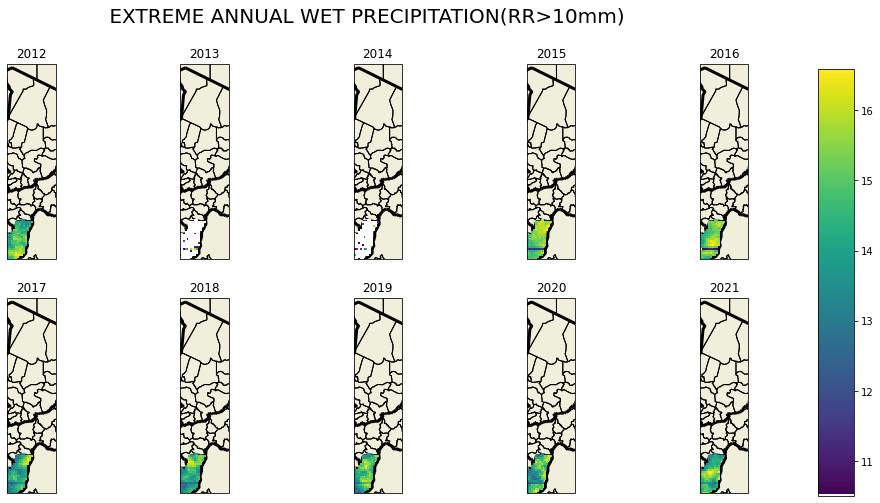

In [132]:
Exterme_Annual_wet_RR= dc_cc.where(dc_cc >10)
Exterme_Annual_wet_RR
Extreme_Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Extreme_Annual_wet


Year=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] 
    
    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Year[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(Extreme_Annual_wet['lon'], Extreme_Annual_wet['lat'], Extreme_Annual_wet[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle(' EXTREME ANNUAL WET PRECIPITATION(RR>10mm)', fontsize='20')

Text(0.5, 0.98, ' EXTREME ANNUAL WET PRECIPITATION(RR>20mm)')

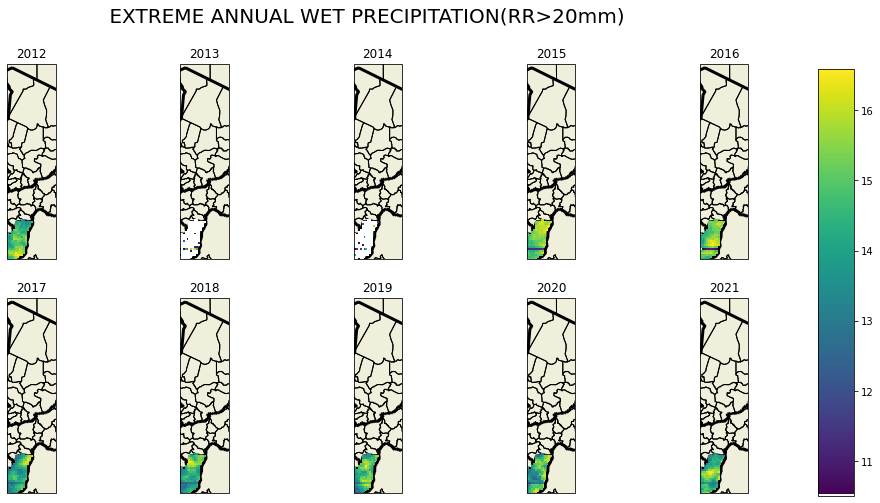

In [134]:
Exterme_Annual_wet_RR= dc_cc.where(dc_cc >20)
Exterme_Annual_wet_RR
Extreme_Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Extreme_Annual_wet


Year=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] 
    
    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Year[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(Extreme_Annual_wet['lon'], Extreme_Annual_wet['lat'], Extreme_Annual_wet[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle(' EXTREME ANNUAL WET PRECIPITATION(RR>20mm)', fontsize='20')

Text(0.5, 0.98, 'EXTREME MONTHLY WET PRECIPITATION(RR>10mm)')

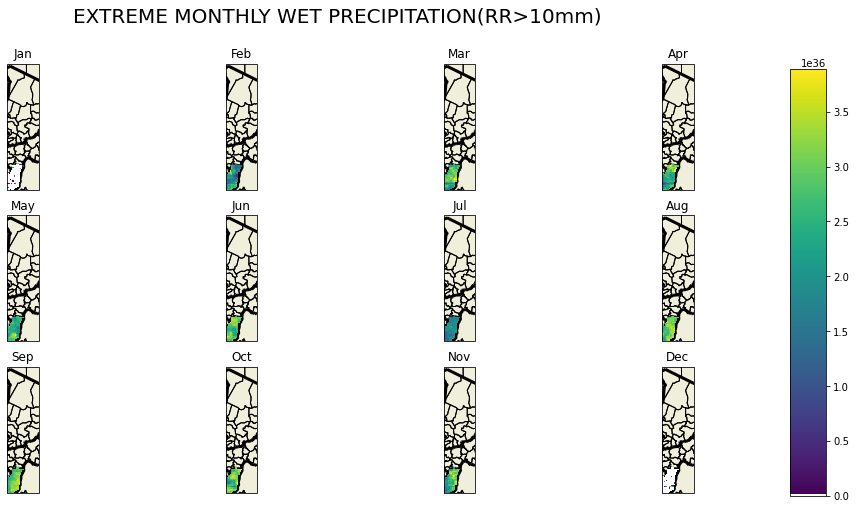

In [135]:
Exetrem_wet_cmon_RR= dc_cc.where(dc_cc >10)
Exetrem_wet_cmon_RR
Exetrem_wet_cmon=Exetrem_wet_cmon_RR.groupby('datetime.month').mean('datetime')
Exetrem_wet_cmon


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Month[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(Exetrem_wet_cmon['lon'], Exetrem_wet_cmon['lat'], Exetrem_wet_cmon[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET PRECIPITATION(RR>10mm)', fontsize='20')

Text(0.5, 0.98, 'EXTREME MONTHLY WET PRECIPITATION(RR>20mm)')

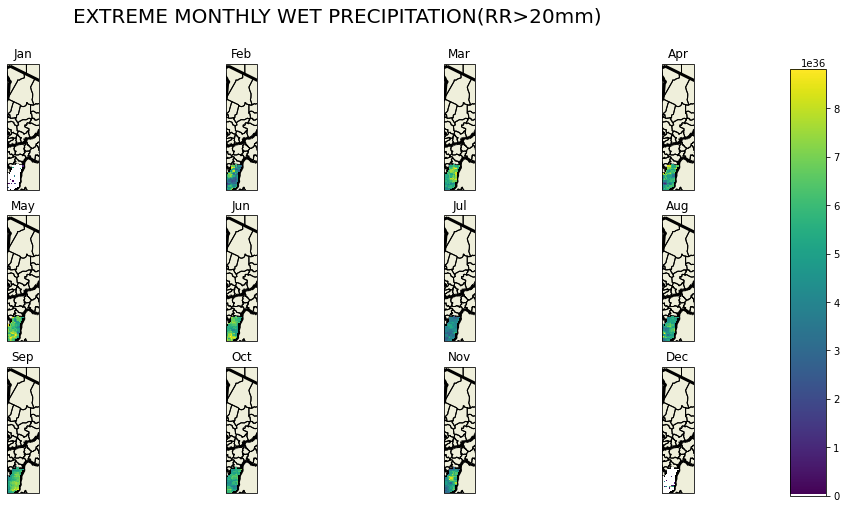

In [139]:
Exetrem_wet_cmon_RR= dc_cc.where(dc_cc >20)
Exetrem_wet_cmon_RR
#Exetrem_cmon_wet=wet_cmon_RR.groupby('datetime.month').mean('datetime')
Exetrem_wet_cmon=Exetrem_wet_cmon_RR.groupby('datetime.month').mean('datetime')
Exetrem_wet_cmon

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.OCEAN)
    ax[i].set_title(Month[i])
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    
    ax[i].set_extent ([15.33,21.60,-1.26,24.00])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(Exetrem_wet_cmon['lon'], Exetrem_wet_cmon['lat'], Exetrem_wet_cmon[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET PRECIPITATION(RR>20mm)', fontsize='20')